In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [201]:
zbiór_danych = pd.read_csv('Desktop/Dane_pogodowe_Krakow_Balice_1.0 - Copy.csv', index_col = 0)

In [202]:
zbiór_danych.head(160)

,t,tx,tn,tng,RH,VA,ch,sw,sw>=10m,sw>=15m,...,śnieg,śn rów,Usłone,op d,op ś,d z ś,mg,rosa,szron,burza
Data,,,,,,,,,,,,,,,,,,,,,
6/30/2023,20.9,27.6,12.4,10.0,64.1,15.1,5.1,2.0,0.0,0.0,...,NaN,0.0,NaN,0.3,NaN,NaN,NaN,NaN,NaN,NaN
6/29/2023,18.4,23.8,12.8,12.0,77.1,15.9,4.3,3.1,0.0,0.0,...,NaN,0.0,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN
6/28/2023,14.8,20.7,9.2,8.0,74.6,12.3,4.9,5.5,1.3,0.0,...,NaN,0.0,NaN,6.7,NaN,NaN,NaN,NaN,NaN,NaN
6/27/2023,17.5,24.0,16.2,13.5,72.8,14.4,5.4,5.0,0.0,0.0,...,NaN,0.0,NaN,3.2,NaN,NaN,NaN,NaN,NaN,NaN
6/26/2023,20.2,26.8,12.0,10.5,61.6,13.8,2.0,1.5,0.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/26/2023,-0.7,0.8,-0.9,-1.6,84.3,4.9,7.9,2.3,0.0,0.0,...,NaN,0.0,NaN,NaN,1.8,NaN,NaN,NaN,NaN,NaN
1/25/2023,0.7,1.8,0.0,-0.8,89.1,5.7,8.0,1.6,0.0,0.0,...,NaN,0.0,NaN,4.6,3.0,NaN,NaN,NaN,NaN,NaN
1/24/2023,1.7,2.2,1.1,0.9,96.4,6.6,8.0,4.4,0.0,0.0,...,NaN,0.0,NaN,18.0,NaN,NaN,1.4,NaN,NaN,NaN


In [203]:
zbiór_danych.apply(pd.isnull).sum()/zbiór_danych.shape[0]

t          0.000000
tx         0.000000
tn         0.000000
tng        0.000000
RH         0.000000
VA         0.000000
ch         0.000000
sw         0.000000
sw>=10m    0.000000
sw>=15m    0.000000
mslp       0.000000
ppp        0.000000
RRR        0.000000
Opad d     0.000000
Opad n     0.000000
śnieg      0.853232
śn rów     0.027462
Usłone     0.501203
op d       0.527669
op ś       0.842944
d z ś      0.955696
mg         0.839874
rosa       0.614785
szron      0.909649
burza      0.920186
dtype: float64

In [204]:
zbiór_danych['śnieg'].value_counts()

2.0     287
1.0     204
3.0     166
4.0     163
6.0      89
7.0      87
8.0      81
10.0     69
9.0      68
5.0      66
13.0     54
11.0     53
12.0     47
14.0     38
16.0     35
15.0     34
17.0     29
20.0     29
18.0     28
19.0     22
21.0     20
25.0     17
22.0     16
24.0     14
23.0     11
26.0      9
30.0      6
29.0      6
27.0      5
28.0      4
36.0      4
37.0      3
32.0      1
31.0      1
35.0      1
39.0      1
33.0      1
Name: śnieg, dtype: int64

In [205]:
skrócony_zbiór_danych = zbiór_danych[['t','tx','tn','tng','op d', 'op ś', 'd z ś', 'ch']].copy()

In [206]:
skrócony_zbiór_danych.columns = [['śr_temp', 'maks_temp', 'min_temp', 'grunt_temp', 'opad_deszczu', 'opad_śniegu', 'deszcz_ze_śniegiem', 'chmury']]

In [207]:
skrócony_zbiór_danych.value_counts()

(śr_temp,)  (maks_temp,)  (min_temp,)  (grunt_temp,)  (opad_deszczu,)  (opad_śniegu,)  (deszcz_ze_śniegiem,)  (chmury,)
-7.4        -2.3          -8.7         -13.0          1.7              20.0            1.9                    8.0          1
 2.1         3.5           1.0          0.5           7.1              0.8             1.4                    7.5          1
             5.7           0.4         -2.6           11.8             5.9             1.0                    7.3          1
             5.3           0.5         -0.4           10.9             1.6             10.0                   8.0          1
             5.2           0.2         -0.8           7.8              2.7             2.1                    7.6          1
                                                                                                                          ..
 0.8         5.1           0.2          0.0           0.5              8.4             8.8                    8.0          1
     

In [208]:
skrócony_zbiór_danych.isna().sum()

śr_temp                   0
maks_temp                 0
min_temp                  0
grunt_temp                0
opad_deszczu           6360
opad_śniegu           10160
deszcz_ze_śniegiem    11519
chmury                    0
dtype: int64

In [209]:
skrócony_zbiór_danych.head()

,śr_temp,maks_temp,min_temp,grunt_temp,opad_deszczu,opad_śniegu,deszcz_ze_śniegiem,chmury
Data,,,,,,,,
6/30/2023,20.9,27.6,12.4,10.0,0.3,NaN,NaN,5.1
6/29/2023,18.4,23.8,12.8,12.0,0.1,NaN,NaN,4.3
6/28/2023,14.8,20.7,9.2,8.0,6.7,NaN,NaN,4.9
6/27/2023,17.5,24.0,16.2,13.5,3.2,NaN,NaN,5.4
6/26/2023,20.2,26.8,12.0,10.5,NaN,NaN,NaN,2.0


In [210]:
skrócony_zbiór_danych.dtypes

śr_temp               float64
maks_temp             float64
min_temp              float64
grunt_temp            float64
opad_deszczu          float64
opad_śniegu           float64
deszcz_ze_śniegiem    float64
chmury                float64
dtype: object

In [211]:
skrócony_zbiór_danych.index = skrócony_zbiór_danych.index.astype('datetime64')
skrócony_zbiór_danych.index

DatetimeIndex(['2023-06-30', '2023-06-29', '2023-06-28', '2023-06-27',
               '2023-06-26', '2023-06-25', '2023-06-24', '2023-06-23',
               '2023-06-22', '2023-06-21',
               ...
               '1990-07-10', '1990-07-09', '1990-07-08', '1990-07-07',
               '1990-07-06', '1990-07-05', '1990-07-04', '1990-07-03',
               '1990-07-02', '1990-07-01'],
              dtype='datetime64[ns]', name='Data', length=12053, freq=None)

In [212]:
skrócony_zbiór_danych.index.year.value_counts().sort_index()

1990    184
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    181
Name: Data, dtype: int64

<Axes: xlabel='Data'>

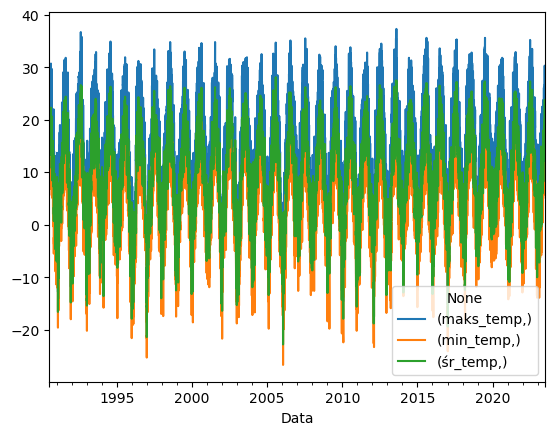

In [213]:
skrócony_zbiór_danych[['maks_temp', 'min_temp', 'śr_temp']].plot()

<Axes: xlabel='Data'>

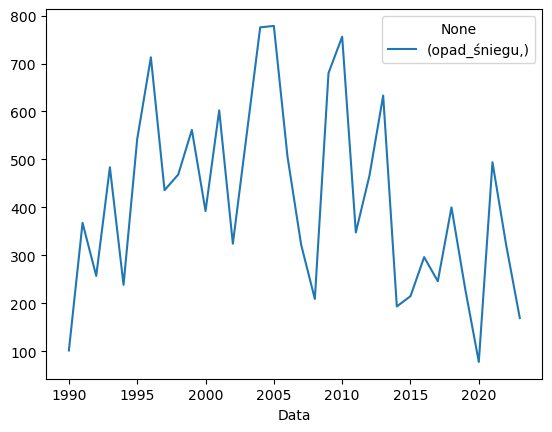

In [214]:
skrócony_zbiór_danych.groupby(skrócony_zbiór_danych.index.year).sum()['opad_śniegu'].plot()

In [215]:
skrócony_zbiór_danych['docelowa_temp'] = skrócony_zbiór_danych.shift(-1)['śr_temp']

In [216]:
skrócony_zbiór_danych = skrócony_zbiór_danych.iloc[:-1,:].copy()

In [217]:
skrócony_zbiór_danych

,śr_temp,maks_temp,min_temp,grunt_temp,opad_deszczu,opad_śniegu,deszcz_ze_śniegiem,chmury,docelowa_temp
Data,,,,,,,,,
2023-06-30,20.9,27.6,12.4,10.0,0.3,NaN,NaN,5.1,18.4
2023-06-29,18.4,23.8,12.8,12.0,0.1,NaN,NaN,4.3,14.8
2023-06-28,14.8,20.7,9.2,8.0,6.7,NaN,NaN,4.9,17.5
2023-06-27,17.5,24.0,16.2,13.5,3.2,NaN,NaN,5.4,20.2
2023-06-26,20.2,26.8,12.0,10.5,NaN,NaN,NaN,2.0,19.0
...,...,...,...,...,...,...,...,...,...
1990-07-06,15.3,20.4,14.3,12.8,17.3,NaN,NaN,8.0,16.3
1990-07-05,16.3,21.9,11.8,11.5,4.1,NaN,NaN,5.5,15.2
1990-07-04,15.2,18.3,13.5,11.7,9.3,NaN,NaN,7.6,15.8


In [218]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error


In [236]:
regresja_liniowa_Ridge = Ridge(alpha = 0.1)
regresja_liniowa_Lasso = Lasso(alpha = 0.1)

In [237]:
predyktory = ['śr_temp','maks_temp','min_temp']

In [238]:
dane_treningowe_1 = skrócony_zbiór_danych.loc[:"2017-01-01"]
dane_testowe_1 = skrócony_zbiór_danych.loc["2017-01-02":]
dane_treningowe = skrócony_zbiór_danych.loc[:"2017-01-01"]
dane_testowe = skrócony_zbiór_danych.loc["2017-01-02":]

In [239]:
regresja_liniowa_Rigde.fit(dane_treningowe[predyktory], dane_treningowe['docelowa_temp'])

Ridge(alpha=0.1)

In [240]:
predykcje = regresja_liniowa_Rigde.predict(dane_testowe[predyktory])

In [241]:
wartości_błędu_obliczeniowego = mean_absolute_error(dane_testowe['docelowa_temp'], predykcje)

In [242]:
połączone_kolumny = pd.concat([dane_testowe['docelowa_temp'], pd.DataFrame(predykcje, index = dane_testowe.index)], axis = 1)

In [243]:
połączone_kolumny.columns = ['aktualna_temp','przewidywana_temp']

In [244]:
połączone_kolumny, wartości_błędu_obliczeniowego

(            aktualna_temp  przewidywana_temp
 Data                                        
 2023-05-31           16.2          13.793464
 2023-05-30           16.0          14.681609
 2023-05-29           13.9          14.580547
 2023-05-28           14.6          12.086729
 2023-05-27           15.9          12.429925
 ...                   ...                ...
 2017-01-06           -4.5         -11.284630
 2017-01-05            0.9          -3.448857
 2017-01-04           -1.2           1.253925
 2017-01-03           -2.6          -2.265136
 2017-01-02           -3.7          -3.858647
 
 [2341 rows x 2 columns],
 1.573569545765164)

<Axes: xlabel='Data'>

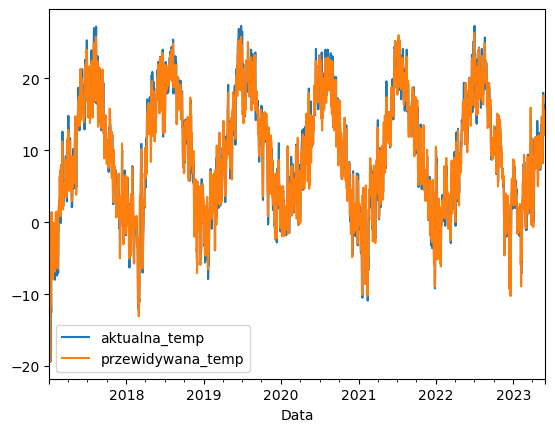

In [245]:
połączone_kolumny.plot()

In [246]:
regresja_liniowa_Rigde.coef_

array([[-0.28088371,  0.55789127,  0.70281849]])

In [247]:
def tworzenie_predykcji(predyktory, skrócony_zbiór_danych, regresja_liniowa):
    dane_treningowe = skrócony_zbiór_danych.loc[:"2017-01-01"]
    dane_treningowe = skrócony_zbiór_danych.loc["2017-01-02":]
    regresja_liniowa.fit(dane_treningowe[predyktory], dane_treningowe['docelowa_temp'])
    predykcje = regresja_liniowa.predict(dane_testowe[predyktory])
    wartości_błędu_obliczeniowego = mean_absolute_error(dane_testowe['docelowa_temp'], predykcje)
    połączone_kolumny = pd.concat([dane_testowe['docelowa_temp'], pd.DataFrame(predykcje, index = dane_testowe.index)], axis = 1)
    połączone_kolumny.columns = ['aktualna','przewidywana']
    return wartości_błędu_obliczeniowego, połączone_kolumny

In [253]:
tworzenie_predykcji(predyktory, skrócony_zbiór_danych, regresja_liniowa_Lasso)

(1.5733257246434886,
             aktualna  przewidywana
 Data                              
 2023-05-31      16.2     14.150432
 2023-05-30      16.0     14.902708
 2023-05-29      13.9     14.737609
 2023-05-28      14.6     12.299708
 2023-05-27      15.9     12.821672
 ...              ...           ...
 2017-01-06      -4.5    -11.721310
 2017-01-05       0.9     -3.678946
 2017-01-04      -1.2      1.368586
 2017-01-03      -2.6     -1.911446
 2017-01-02      -3.7     -3.622546
 
 [2341 rows x 2 columns])

In [250]:
#Przerobić na średnią z ostatnich 30 dni
skrócony_zbiór_danych['maks_miesięczny'] = skrócony_zbiór_danych['maks_temp'].rolling(30).mean()
skrócony_zbiór_danych = skrócony_zbiór_danych.iloc[30:,:].copy()
skrócony_zbiór_danych['maks_miesięczny'] = skrócony_zbiór_danych['maks_miesięczny'].iloc[30:].copy()
skrócony_zbiór_danych[['maks_temp', 'maks_miesięczny']]

,maks_temp,maks_miesięczny
Data,,
2023-05-01,18.5,NaN
2023-04-30,15.8,NaN
2023-04-29,15.5,NaN
2023-04-28,16.0,NaN
2023-04-27,9.8,NaN
...,...,...
1990-07-06,20.4,NaN
1990-07-05,21.9,NaN
1990-07-04,18.3,NaN


,max_temp
Data,
2023-05-31,22.5
2023-05-30,21.9
2023-05-29,22.5
2023-05-28,20.5
2023-05-27,19.2
...,...
1990-07-06,20.4
1990-07-05,21.9
1990-07-04,18.3


In [233]:
dataset_temp['max_month_day'] = np.divide(dataset_temp['max_month'].values, dataset_temp['max_temp'].values, out = np.zeros_like(dataset_temp['max_month'].values), where = dataset_temp['max_temp'].values != 0)

NameError: name 'dataset_temp' is not defined

In [40]:
dataset_temp["max_min"] = dataset_temp["max_temp"].values - dataset_temp["min_temp"].values

In [41]:
dataset_temp["max_month_day"].tail(50)

,max_month_day
Data,
1990-08-20,0.765972
1990-08-19,0.926368
1990-08-18,0.895714
1990-08-17,0.741026
1990-08-16,0.708273
1990-08-15,0.660043
1990-08-14,0.686359
1990-08-13,0.735517
1990-08-12,0.834359


In [42]:
predictors = ['śr_temp','max_temp','min_temp','max_month', 'max_min']

In [43]:
dataset_temp = dataset_temp.iloc[30:,:].copy()

In [44]:
create_predictions(predictors, dataset_temp, reg)

(2.1800625093997565,
             aktualna  przewidywana
 Data                              
 2023-05-01      15.8     14.814201
 2023-04-30      15.5     16.951676
 2023-04-29      16.0     14.874466
 2023-04-28       9.8     14.028726
 2023-04-27       9.7      9.840505
 ...              ...           ...
 2020-01-06       2.1      1.604979
 2020-01-05       6.1      3.557370
 2020-01-04       5.9      5.763324
 2020-01-03       5.3      4.219220
 2020-01-02       4.9      5.306162
 
 [1216 rows x 2 columns])

<Axes: xlabel='Data'>

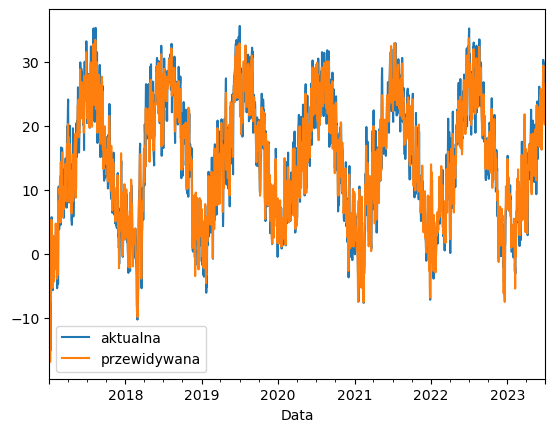

In [45]:
combined.plot()

In [46]:
dataset_temp['max_temp']

,max_temp
Data,
2023-05-01,18.5
2023-04-30,15.8
2023-04-29,15.5
2023-04-28,16.0
2023-04-27,9.8
...,...
1990-07-06,20.4
1990-07-05,21.9
1990-07-04,18.3


In [47]:
dataset_temp['monthly_avg'] = dataset_temp['max_temp'].values
dataset_temp['monthly_avg'] = dataset_temp['monthly_avg'].groupby(dataset_temp.index.month, group_keys=False).apply(lambda x: x.expanding(1).mean())

In [48]:
dataset_temp['monthly_avg']

,monthly_avg
Data,
2023-05-01,18.500000
2023-04-30,15.800000
2023-04-29,15.650000
2023-04-28,15.766667
2023-04-27,14.275000
...,...
1990-07-06,25.279666
1990-07-05,25.276349
1990-07-04,25.269510


In [49]:
dataset_temp['day_of_year_avg'] = dataset_temp['max_temp'].values
dataset_temp['day_of_year_avg'] = dataset_temp['day_of_year_avg'].groupby(dataset_temp.index.day_of_year, group_keys=False).apply(lambda x: x.expanding(1).mean())

In [50]:
dataset_temp['day_of_year_avg']
dataset_temp[['opad_deszczu', 'opad_śniegu', 'deszcz_ze_śniegiem']] = dataset_temp[['opad_deszczu', 'opad_śniegu', 'deszcz_ze_śniegiem']].fillna(0)

In [51]:
predictors = ['śr_temp','max_temp','min_temp','max_month', 'max_min', 'monthly_avg', 'day_of_year_avg', 'grunt_temp', 'max_month_day', 'opad_deszczu', 'opad_śniegu', 'deszcz_ze_śniegiem', 'chmury']

In [52]:
create_predictions(predictors, dataset_temp, reg)

(2.140093672736191,
             aktualna  przewidywana
 Data                              
 2023-05-01      15.8     14.988150
 2023-04-30      15.5     17.181505
 2023-04-29      16.0     14.362769
 2023-04-28       9.8     13.680733
 2023-04-27       9.7      9.730041
 ...              ...           ...
 2020-01-06       2.1      1.512879
 2020-01-05       6.1      4.075776
 2020-01-04       5.9      5.103775
 2020-01-03       5.3      5.010470
 2020-01-02       4.9      5.325343
 
 [1216 rows x 2 columns])

In [53]:
reg.coef_

array([[-0.62659221,  0.85091594,  0.85734081,  0.03614353, -0.00642486,
         0.03984519,  0.05246682, -0.131503  , -0.00711924,  0.06037923,
         0.02356867, -0.02283135, -0.28042273]])

In [50]:
skrócony_zbiór_danych.corr()['docelowa_temp']

KeyError: 'docelowa_temp'

In [55]:
combined['diff'] = (combined['aktualna'] - combined['przewidywana']).abs()

In [56]:
combined.sort_values('diff', ascending = False).head()

,aktualna,przewidywana,diff
Data,,,
2021-12-26,7.9,-5.116543,13.016543
2020-04-14,21.4,8.705407,12.694593
2020-05-13,20.9,10.296174,10.603826
2022-06-21,32.1,21.654256,10.445744
2018-06-23,26.9,16.780863,10.119137


In [57]:
#Predict weather for the week instead of one day
#More predictors
#Diff training/test ratio

In [58]:
dataset_temp.dtypes

śr_temp               float64
max_temp              float64
min_temp              float64
grunt_temp            float64
opad_deszczu          float64
opad_śniegu           float64
deszcz_ze_śniegiem    float64
chmury                float64
docelowa_temp         float64
max_month             float64
max_month_day         float64
max_min               float64
monthly_avg           float64
day_of_year_avg       float64
dtype: object

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf

In [60]:
x = np.array(dataset_temp['śr_temp'])
y = np.array(dataset_temp['docelowa_temp'])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 2)
from sklearn.linear_model import LinearRegression

In [62]:
def create_predictions_linear(predictors, dataset_temp, reg_lin):
    train = dataset_temp.loc[:"2020-01-01"]
    test = dataset_temp.loc["2020-01-02":]
    reg_lin.fit(train[predictors], train['docelowa_temp'])
    predictions = reg_lin.predict(test[predictors])
    error_lin = mean_absolute_error(test['docelowa_temp'], predictions)
    combined_lin = pd.concat([test['docelowa_temp'], pd.DataFrame(predictions, index = test.index)], axis = 1)
    combined_lin.columns = ['aktualna','przewidywana']
    return error_lin, combined_lin

In [63]:
reg_lin = LinearRegression()

In [64]:
create_predictions_linear(predictors, dataset_temp, reg_lin)

(2.1400936195831077,
             aktualna  przewidywana
 Data                              
 2023-05-01      15.8     14.988133
 2023-04-30      15.5     17.181502
 2023-04-29      16.0     14.362760
 2023-04-28       9.8     13.680737
 2023-04-27       9.7      9.730035
 ...              ...           ...
 2020-01-06       2.1      1.512881
 2020-01-05       6.1      4.075786
 2020-01-04       5.9      5.103742
 2020-01-03       5.3      5.010489
 2020-01-02       4.9      5.325364
 
 [1216 rows x 2 columns])

In [65]:
create_predictions(predictors, dataset_temp, reg)

(2.140093672736191,
             aktualna  przewidywana
 Data                              
 2023-05-01      15.8     14.988150
 2023-04-30      15.5     17.181505
 2023-04-29      16.0     14.362769
 2023-04-28       9.8     13.680733
 2023-04-27       9.7      9.730041
 ...              ...           ...
 2020-01-06       2.1      1.512879
 2020-01-05       6.1      4.075776
 2020-01-04       5.9      5.103775
 2020-01-03       5.3      5.010470
 2020-01-02       4.9      5.325343
 
 [1216 rows x 2 columns])

In [66]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso

In [67]:
def create_predictions_lasso(predictors, dataset_temp, reg_las):
    train = dataset_temp.loc[:"2020-01-01"]
    test = dataset_temp.loc["2020-01-02":]
    reg_las.fit(train[predictors], train['docelowa_temp'])
    predictions = reg_las.predict(test[predictors])
    error_las = mean_absolute_error(test['docelowa_temp'], predictions)
    combined_las = pd.concat([test['docelowa_temp'], pd.DataFrame(predictions, index = test.index)], axis = 1)
    combined_las.columns = ['aktualna','przewidywana']
    return error_las, combined_las

In [68]:
reg_las = Lasso()

In [69]:
create_predictions_lasso(predictors, dataset_temp, reg_las)

(2.211101385996033,
             aktualna  przewidywana
 Data                              
 2023-05-01      15.8     15.707223
 2023-04-30      15.5     16.587948
 2023-04-29      16.0     15.095227
 2023-04-28       9.8     14.352083
 2023-04-27       9.7      9.942118
 ...              ...           ...
 2020-01-06       2.1      1.994475
 2020-01-05       6.1      3.770918
 2020-01-04       5.9      6.567669
 2020-01-03       5.3      4.181766
 2020-01-02       4.9      4.818113
 
 [1216 rows x 2 columns])

In [70]:
def create_predictions_RigdeCV(predictors, dataset_temp, reg_cv):
    train = dataset_temp.loc[:"2020-01-01"]
    test = dataset_temp.loc["2020-01-02":]
    reg_cv.fit(train[predictors], train['docelowa_temp'])
    predictions = reg_cv.predict(test[predictors])
    error_cv = mean_absolute_error(test['docelowa_temp'], predictions)
    combined_cv = pd.concat([test['docelowa_temp'], pd.DataFrame(predictions, index = test.index)], axis = 1)
    combined_cv.columns = ['aktualna','przewidywana']
    return error_cv, combined_cv

In [71]:
reg_cv = RidgeCV()

In [72]:
create_predictions_RigdeCV(predictors, dataset_temp, reg_cv)

(2.1400989157279486,
             aktualna  przewidywana
 Data                              
 2023-05-01      15.8     14.989853
 2023-04-30      15.5     17.181828
 2023-04-29      16.0     14.363616
 2023-04-28       9.8     13.680339
 2023-04-27       9.7      9.730620
 ...              ...           ...
 2020-01-06       2.1      1.512716
 2020-01-05       6.1      4.074724
 2020-01-04       5.9      5.107016
 2020-01-03       5.3      5.008521
 2020-01-02       4.9      5.323279
 
 [1216 rows x 2 columns])

In [73]:
print(create_predictions_linear(predictors, dataset_temp, reg_lin))
print(create_predictions_RigdeCV(predictors, dataset_temp, reg_cv))

(2.1400936195831077,             aktualna  przewidywana
Data                              
2023-05-01      15.8     14.988133
2023-04-30      15.5     17.181502
2023-04-29      16.0     14.362760
2023-04-28       9.8     13.680737
2023-04-27       9.7      9.730035
...              ...           ...
2020-01-06       2.1      1.512881
2020-01-05       6.1      4.075786
2020-01-04       5.9      5.103742
2020-01-03       5.3      5.010489
2020-01-02       4.9      5.325364

[1216 rows x 2 columns])
(2.1400989157279486,             aktualna  przewidywana
Data                              
2023-05-01      15.8     14.989853
2023-04-30      15.5     17.181828
2023-04-29      16.0     14.363616
2023-04-28       9.8     13.680339
2023-04-27       9.7      9.730620
...              ...           ...
2020-01-06       2.1      1.512716
2020-01-05       6.1      4.074724
2020-01-04       5.9      5.107016
2020-01-03       5.3      5.008521
2020-01-02       4.9      5.323279

[1216 rows x 2 column

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
regr = DecisionTreeRegressor(max_depth=7)
predictors_2 = ['śr_temp','max_temp','min_temp','max_month', 'max_min', 'monthly_avg', 'day_of_year_avg', 'grunt_temp', 'max_month_day', 'chmury']
predictors_3 = ['śr_temp','max_temp','min_temp','max_month', 'max_min', 'monthly_avg', 'day_of_year_avg', 'grunt_temp', 'max_month_day', 'chmury']

In [76]:
#regr.fit(train[predictors_2], train['docelowa_temp'])

In [77]:
#y_1 = regr.predict(test[predictors_2])

In [78]:
def create_predictions_Tree(predictors_2, dataset_temp, regr):
    train = dataset_temp.loc[:"2020-01-01"]
    test = dataset_temp.loc["2020-01-02":]
    regr.fit(train[predictors_2], train['docelowa_temp'])
    predictions = regr.predict(test[predictors_2])
    error_r = mean_absolute_error(test['docelowa_temp'], predictions)
    combined_r = pd.concat([test['docelowa_temp'], pd.DataFrame(predictions, index = test.index)], axis = 1)
    combined_r.columns = ['aktualna','przewidywana']
    return error_r, combined_r

In [79]:
create_predictions_Tree(predictors_2, dataset_temp, regr)

(2.287464379343543,
             aktualna  przewidywana
 Data                              
 2023-05-01      15.8     16.939608
 2023-04-30      15.5     16.939608
 2023-04-29      16.0     14.839109
 2023-04-28       9.8     14.839109
 2023-04-27       9.7      9.343169
 ...              ...           ...
 2020-01-06       2.1      0.673913
 2020-01-05       6.1      2.652381
 2020-01-04       5.9      5.909066
 2020-01-03       5.3      4.584416
 2020-01-02       4.9      4.888312
 
 [1216 rows x 2 columns])

In [234]:
X_train, y_train, X_test, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

NameError: name 'train_test_split' is not defined

In [235]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from keras.optimizers import Adam

In [82]:
# create ANN model
#ANN = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
#ANN.add(Dense(units=5, input_dim=1, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
#ANN.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
#ANN.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
#ANN.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
#ANN.fit(train[predictors_3], train['docelowa_temp'] ,batch_size = 20, epochs = 20, verbose=1)

In [254]:
#train1 = sc.fit_transform(train1)
train2 = dane_treningowe_1.copy()
train2 = train2.reset_index()
train2 = np.array(train2)
train2 = train2[:,-1]
train2 = np.atleast_2d(train2)
train2 = np.asarray(train2).astype('float32')
train2 = train2.T
train2 = np.reshape(train2, (train2.shape[0] , train2.shape[1], 1) )
train2

array([[[-1.4066666]],

       [[-1.3533334]],

       [[-1.3166667]],

       ...,

       [[22.583334 ]],

       [[22.436666 ]],

       [[22.236666 ]]], dtype=float32)

In [255]:
train2.shape

(9681, 1, 1)

In [256]:
#Feature Scaling 
#from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler(feature_range=(0,1))


In [257]:
train2

array([[[-1.4066666]],

       [[-1.3533334]],

       [[-1.3166667]],

       ...,

       [[22.583334 ]],

       [[22.436666 ]],

       [[22.236666 ]]], dtype=float32)

In [263]:
predictors_2 = dane_treningowe.copy()
predictors_2 = predictors_2.reset_index()
predictors_2 = np.array(predictors_2)
predictors_2 = predictors_2[:,1:2]
predictors_2 = np.asarray(predictors_2).astype('float32')
predictors_2 = np.reshape(predictors_2, (predictors_2.shape[0] , predictors_2.shape[1], 1) )
predictors_2.shape

(9681, 1, 1)

In [262]:

predictors_2

array([[[-3.7],
        [ 4.7]],

       [[-3.2],
        [ 3.5]],

       [[-3.6],
        [ 1. ]],

       ...,

       [[15.2],
        [18.3]],

       [[15.8],
        [20.2]],

       [[17.9],
        [22.4]]], dtype=float32)

In [88]:
#regressor = Sequential()
#regressor.add(LSTM(units=50, return_sequences=True, input_shape = (train[predictors_3].shape[1], 1)))
#regressor.add(Dropout(0.2))
#regressor.add(LSTM(units= 50 , return_sequences=True))
#regressor.add(Dropout(0.2))
#regressor.add(LSTM(units= 50 , return_sequences=True))
#regressor.add(Dropout(0.2))
#regressor.add(LSTM(units= 50))
#regressor.add(Dropout(0.2))
#regressor.add(Dense(units = 1,activation='linear'))
#regressor.compile(optimizer='adam', loss='mean_squared_error')
#regressor.fit(train[predictors_3], train['docelowa_temp'], epochs=20 ,batch_size=10 )

In [270]:
#test1 = sc.transform(test1)
test_2 = dane_testowe_1.copy()
test_2 = test_2.reset_index()
test_2 = np.array(test_2)
test_2 = test_2[:,1:2]
test_2 = np.asarray(test_2).astype('float32')
test_2 = np.atleast_2d(test_2)
#test_2 = test_2.T
test_2 = np.reshape(test_2, (test_2.shape[0] , test_2.shape[1], 1 ))
type(test_2)
test_2.shape

(2341, 1, 1)

In [265]:
regressor = Sequential()
regressor.add(Bidirectional(LSTM(units= 50, return_sequences=True, input_shape = (predictors_2.shape[1], 1))))
regressor.add(LSTM(units= 50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1,activation='linear'))
opt = Adam(learning_rate=0.01)
regressor.compile(optimizer=opt, loss='mean_absolute_error')
regressor.fit(predictors_2, train2, epochs=20, batch_size=10 )

Epoch 1/20
969/969 [==============================] - 41s 12ms/step - loss: 4.0757
Epoch 2/20
969/969 [==============================] - 12s 12ms/step - loss: 3.6526
Epoch 3/20
969/969 [==============================] - 13s 13ms/step - loss: 3.6029
Epoch 4/20
969/969 [==============================] - 12s 13ms/step - loss: 3.6219
Epoch 5/20
969/969 [==============================] - 13s 14ms/step - loss: 3.6108
Epoch 6/20
969/969 [==============================] - 14s 14ms/step - loss: 3.5606
Epoch 7/20
969/969 [==============================] - 18s 19ms/step - loss: 3.5751
Epoch 8/20
969/969 [==============================] - 14s 15ms/step - loss: 3.5456
Epoch 9/20
969/969 [==============================] - 13s 13ms/step - loss: 3.5643
Epoch 10/20
969/969 [==============================] - 12s 13ms/step - loss: 3.5418
Epoch 11/20
969/969 [==============================] - 12s 12ms/step - loss: 3.5461
Epoch 12/20
969/969 [==============================] - 12s 12ms/step - loss: 3.5610
E

In [ ]:
#ANN_predicted_temperature = ANN.predict(test[predictors_2])

In [90]:
tf.keras.callbacks.History()

In [271]:
predicted_temperature = regressor.predict(test_2)
#predicted_temperature = sc.inverse_transform(predicted_temperature)
#predicted_temperature = np.reshape(predicted_temperature,(predicted_temperature.shape[1],predicted_temperature.shape[0]))

74/74 [==============================] - 5s 6ms/step


In [273]:
predicted_temperature = pd.DataFrame(predicted_temperature)
predicted_temperature.index = dane_testowe_1.index.copy()
predicted_temperature.columns = ['wanted_temp']
predicted_temperature

,wanted_temp
Data,
2023-05-31,21.952909
2023-05-30,21.942446
2023-05-29,21.921684
2023-05-28,21.328894
2023-05-27,21.635693
...,...
2017-01-06,2.060573
2017-01-05,2.060581
2017-01-04,5.052851


In [ ]:
test['docelowa_temp'].plot()

In [ ]:
predicted_temp = pd.DataFrame(predicted_temperature)

In [ ]:
predicted_temp = pd.DataFrame(predicted_temp.values.reshape((1276,1)))

In [ ]:
predicted_temp = predicted_temp.astype('float64')

In [ ]:
predicted_temp.index = test.index

In [ ]:
ANN_predicted_temperature = pd.DataFrame(ANN_predicted_temperature)
ANN_predicted_temperature.index = test.index

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
predicted_temp.plot(ax=ax)
test['docelowa_temp'].plot(ax=ax2, color = 'red')

In [ ]:
fig1, ax1 = plt.subplots()
ax3 = ax1.twinx()
combined['przewidywana'].plot(ax=ax1)
test['docelowa_temp'].plot(ax=ax3, color = 'red')

In [94]:
error_2 = mean_absolute_error(test['docelowa_temp'], combined['przewidywana'])
#error_3 = mean_absolute_error(test['docelowa_temp'], predicted_temp)
#error_4 = mean_absolute_error(test['docelowa_temp'], ANN_predicted_temperature)
error_5 = mean_absolute_error(test['docelowa_temp'], predicted_temperature)

In [ ]:
test_2['wanted_temp'] = test_2['wanted_temp'].astype('float64')

In [95]:
error_5

5.114904324568962

NameError: name 'ANN_predicted_temperature' is not defined

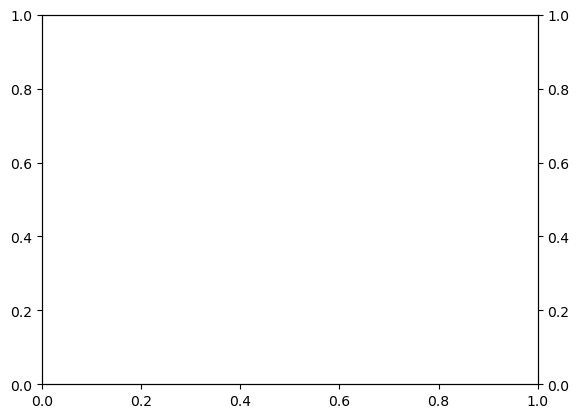

In [111]:
fig4, ax4 = plt.subplots()
ax5 = ax4.twinx()
ANN_predicted_temperature.plot(ax=ax4)
test['docelowa_temp'].plot(ax=ax5, color = 'red')

<Axes: xlabel='Data'>

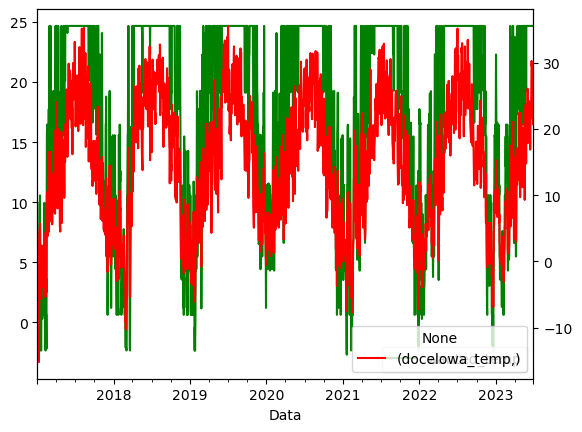

In [95]:
fig7, ax7 = plt.subplots()
ax8 = ax7.twinx()
predicted_temperature.plot(ax=ax7, color = 'green')
test['docelowa_temp'].plot(ax=ax8, color = 'red')

In [97]:
error_5

4.354382339744617